In [ ]:
# ..... cell-cycle scoring ..... #

In [2]:
library(Seurat)

In [3]:
# get list of samples
stages = rep(c('stage23', 'stage28', 'stage32'), each = 3)
samples = c('sample3', 'sample4', 'sample10', 'sample5', 'sample10', 'sample11',
           'sample5', 'sample10', 'sample12')

In [4]:
# load cell-cycle genes list
load('~/septation/cc.genes.rda')

# A list of cell cycle markers, from Tirosh et al, 2015, is loaded with Seurat.  We can
# segregate this list into markers of G2/M phase and markers of S phase
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

In [71]:
# load seurat object
id = 9
sce = readRDS(paste0(stages[id], '_', samples[id], '_raw_data.rds'))
dim(sce)

# filter low-expressed genes and high MT cells
sce <- sce[,which(sce$nFeature_RNA>150 & sce$mitoRatio<0.05)]

# remove cells with very low or very high UMI
sce <- sce[,which(sce$nCount_RNA>150 & sce$nCount_RNA<12000)]

dim(sce)

# Perform cell cycle scoring
sce <- CellCycleScoring(sce, g2m.features = g2m.genes, s.features = s.genes, set.ident = TRUE)
sce@meta.data[1,]

[1] 17007  9011

[1] 17007  6747

Warning message:
“The following features are not present in the object: MLF1IP, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: UBE2C, MKI67, CCNB2, CKAP2L, AURKB, CDC25C, CDCA8, PSRC1, not searching for symbol synonyms”


orig.ident nCount_RNA nFeature_RNA
stage32_sample12_AAACCCAAGTCATACC-1 stage32    6145       2138        
                                    mitoRatio   log10GenesPerUMI sample  
stage32_sample12_AAACCCAAGTCATACC-1 0.007485761 0.8789728        sample12
                                    S.Score  G2M.Score  Phase old.ident
stage32_sample12_AAACCCAAGTCATACC-1 -0.17797 -0.1880435 G1    stage32

In [72]:
# run pca on data
sce <- NormalizeData(sce)
sce <- FindVariableFeatures(sce, selection.method = "vst")
sce <- ScaleData(sce, features = rownames(sce), verbose = FALSE)
sce <- RunPCA(sce, features = VariableFeatures(sce), verbose =  FALSE)

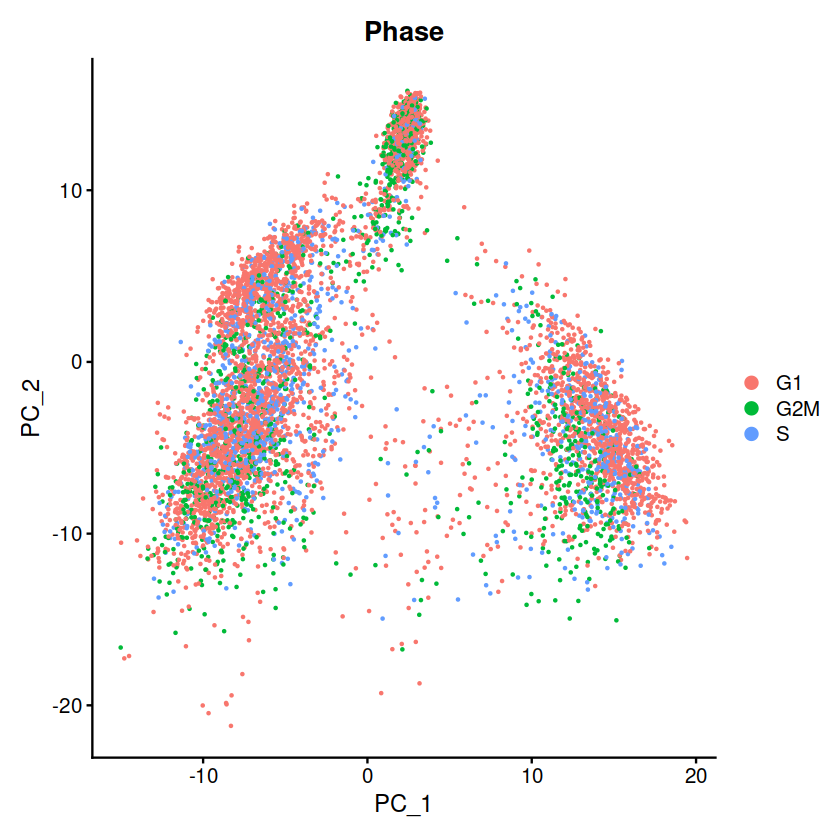

In [73]:
# Visualize the PCA, grouping by cell cycle phase
# png(paste0(stages[id], '_', samples[id], '_pca_cellcycle.png'), width = 8, height = 8, res = 300, units = 'in')
DimPlot(sce, reduction = "pca", group.by = "Phase")
# dev.off()

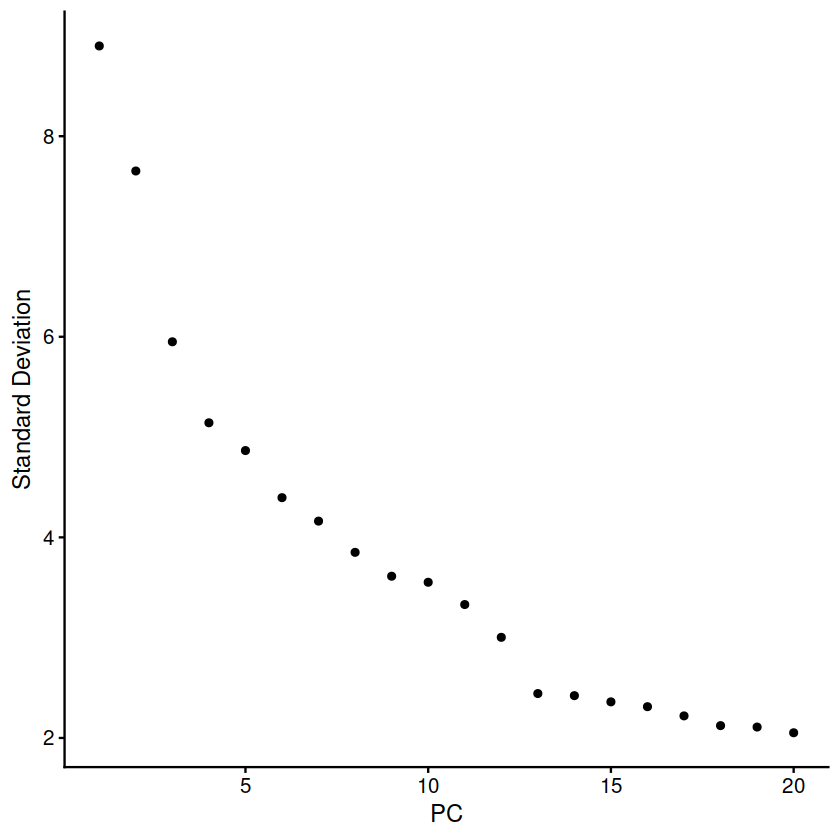

In [74]:
# elbow plot for num of PCs to choose
ElbowPlot(object = sce)

In [75]:
# cluster the data
sce <- FindNeighbors(sce, dims = 1:20, k = 30)

sce <- FindClusters(object = sce, resolution = 0.5, verbose = FALSE)

Computing nearest neighbor graph

Computing SNN



In [76]:
# run umap
sce <- RunUMAP(object = sce, dims = 1:20, verbose = FALSE)

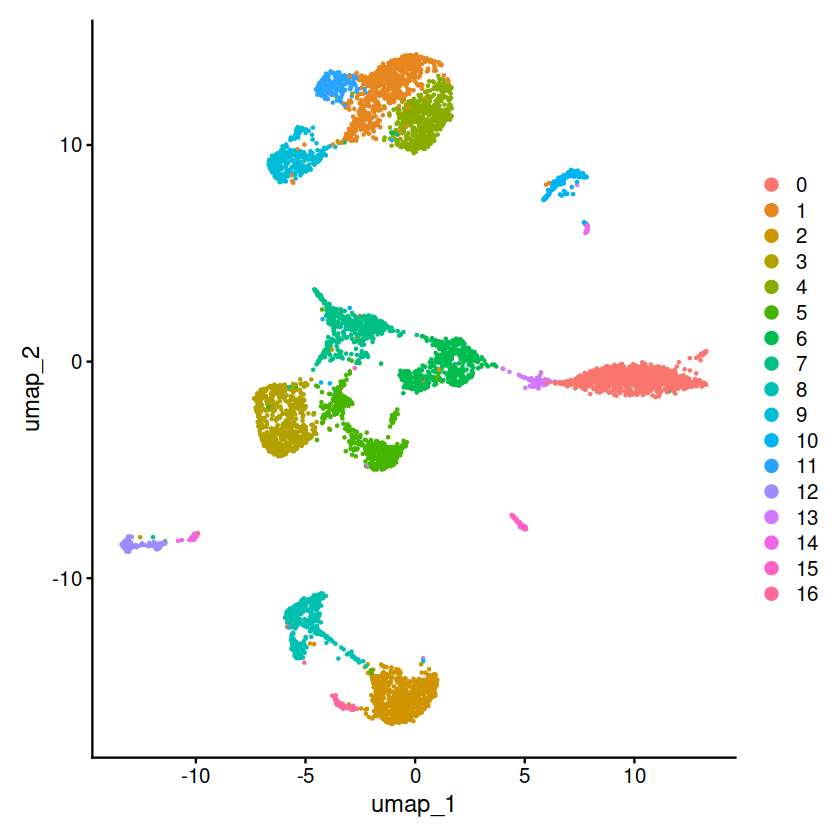

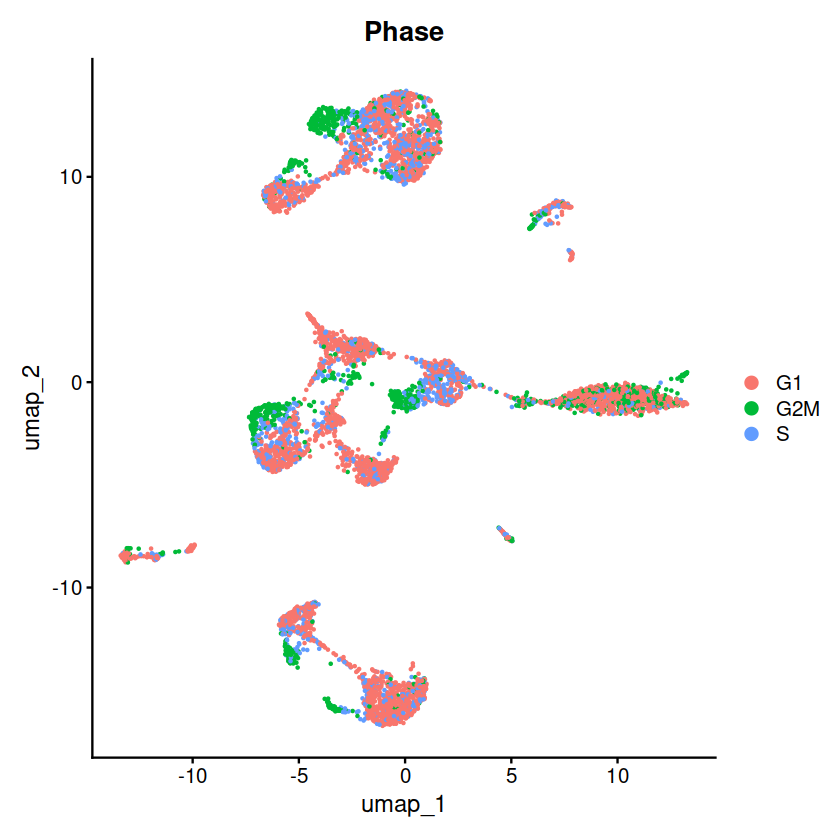

In [77]:
# plot umap
# png(paste0(stages[id], '_', samples[id], '_umap_clusters.png'), width = 8, height = 8, res = 300, units = 'in')
DimPlot(sce)
# dev.off()

# png(paste0(stages[id], '_', samples[id], '_umap_cellcycle.png'), width = 8, height = 8, res = 300, units = 'in')
DimPlot(sce, reduction = 'umap', group.by = 'Phase')
# dev.off()

In [78]:
# save file
saveRDS(sce, file = paste0(stages[id], '_', samples[id], '_data.rds'))